In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student_score.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [9]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [10]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# DROP unnamed column
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [44]:
df.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Gender Distribution

In [ ]:
plt.figure(figsize=(4, 4))  
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender distribution")
plt.show()

# From the above chart we coclude that females are more in numbers

In [6]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


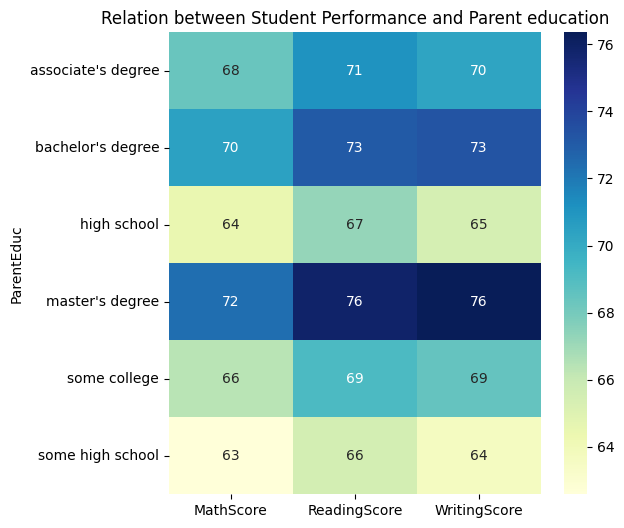

In [51]:
plt.figure(figsize=(6, 6)) 
sns.heatmap(gb, annot = True, cmap="YlGnBu")
plt.title("Relation between Student Performance and Parent education")
plt.show()

# from the above chart we can conclude that education of parent contribute significantly in the performance of students

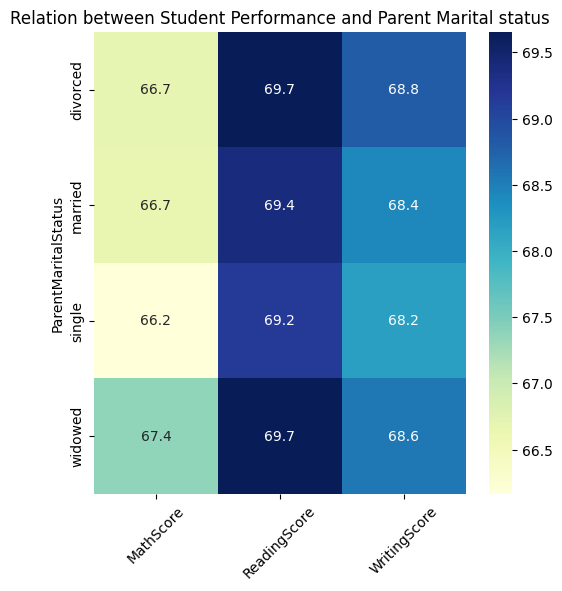

In [52]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean", "WritingScore":"mean"})
plt.figure(figsize=(6, 6)) 
sns.heatmap(gb1, annot = True, fmt=".1f", cmap="YlGnBu")
plt.title("Relation between Student Performance and Parent Marital status")
plt.xticks(rotation=45)
plt.show()

# From the above chart we can conclude that there was no or neglible impact on Parents marital status and student performance

# The below charts are to check outliers

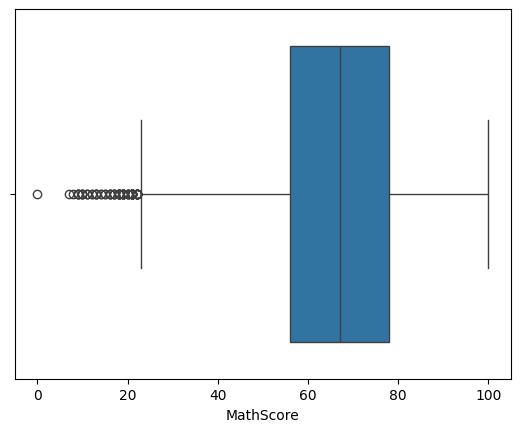

In [53]:
sns.boxplot(data = df, x= "MathScore")
plt.show()

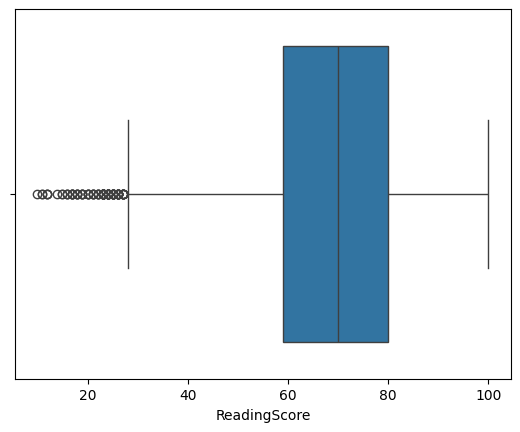

In [54]:
sns.boxplot(data = df, x= "ReadingScore")
plt.show()

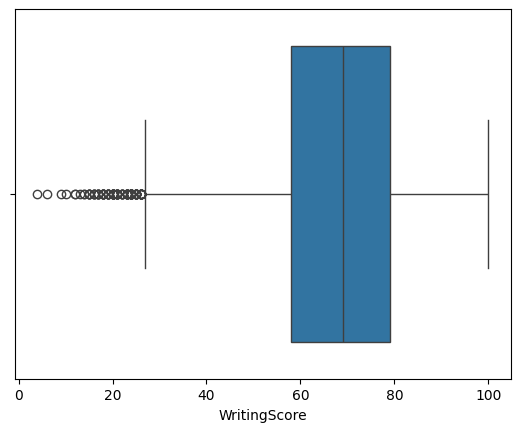

In [55]:
sns.boxplot(data = df, x= "WritingScore")
plt.show()

In [8]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

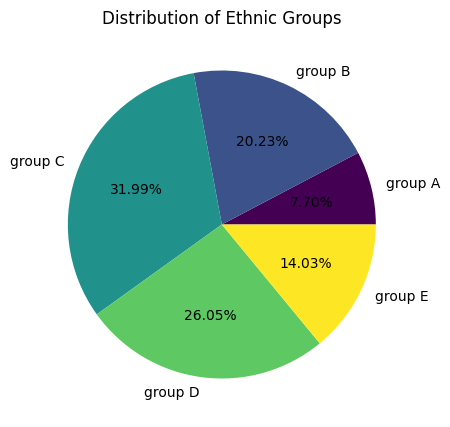

In [24]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count() 
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["group A","group B","group C","group D","group E"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]

plt.figure(figsize=(5,5))
plt.pie(mlist, labels=l, autopct="%1.2f%%", colors=plt.cm.viridis(np.linspace(0, 1, len(l))))  # Using viridis colormap
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212')]

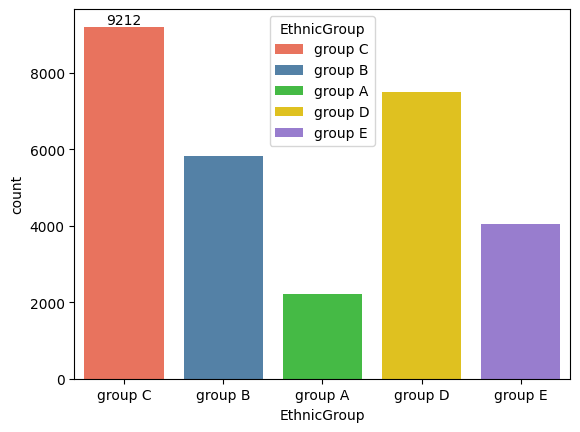

In [35]:
ax = sns.countplot(data = df, x = "EthnicGroup", hue="EthnicGroup", palette=["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#9370DB"])
ax.bar_label(ax.containers[0])

# Impact of Lunch Type (Standard vs. Free/Reduced) on Performance

In [52]:
# Group by LunchType and calculate the mean scores
lunch_performance = df.groupby('LunchType').agg({'MathScore': 'mean','ReadingScore': 'mean','WritingScore': 'mean'}).reset_index()

print("Average Scores by Lunch Type:")
print(lunch_performance)


Average Scores by Lunch Type:
      LunchType  MathScore  ReadingScore  WritingScore
0  free/reduced  58.862332     64.189735     62.650522
1      standard  70.709370     72.175634     71.529716


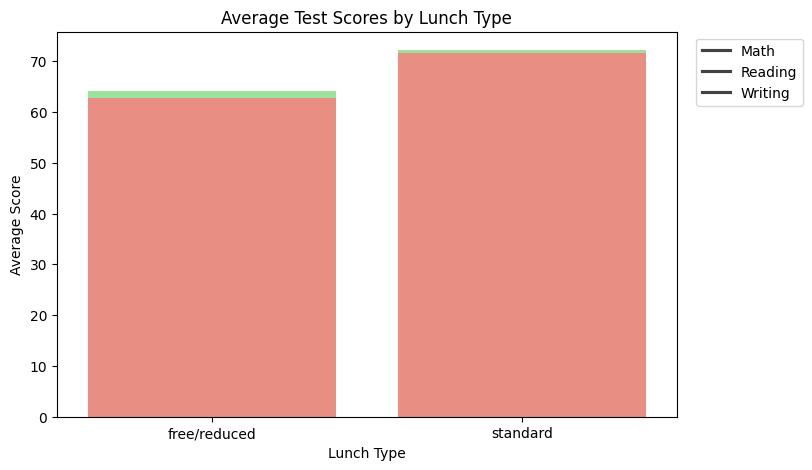

In [56]:
plt.figure(figsize=(8, 5))

sns.barplot(x='LunchType', y='MathScore', data=lunch_performance, label='Math Score', color='skyblue')
sns.barplot(x='LunchType', y='ReadingScore', data=lunch_performance, label='Reading Score', color='lightgreen')
sns.barplot(x='LunchType', y='WritingScore', data=lunch_performance, label='Writing Score', color='salmon')

plt.title("Average Test Scores by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.legend(labels=['Math', 'Reading', 'Writing'], loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()


 # Effect of practice sport frequency on academic performance.

In [65]:
# Group by PracticeSport and calculate mean scores
sport_performance = df.groupby('PracticeSport').agg({'MathScore': 'mean','ReadingScore': 'mean','WritingScore': 'mean'}).reset_index()

# Display the results
print("Average Scores by Practice Sport Frequency:")
print(sport_performance)


Average Scores by Practice Sport Frequency:
  PracticeSport  MathScore  ReadingScore  WritingScore
0         never  64.171079     68.337662     66.522727
1     regularly  67.839155     69.943019     69.604003
2     sometimes  66.274831     69.241307     68.072438


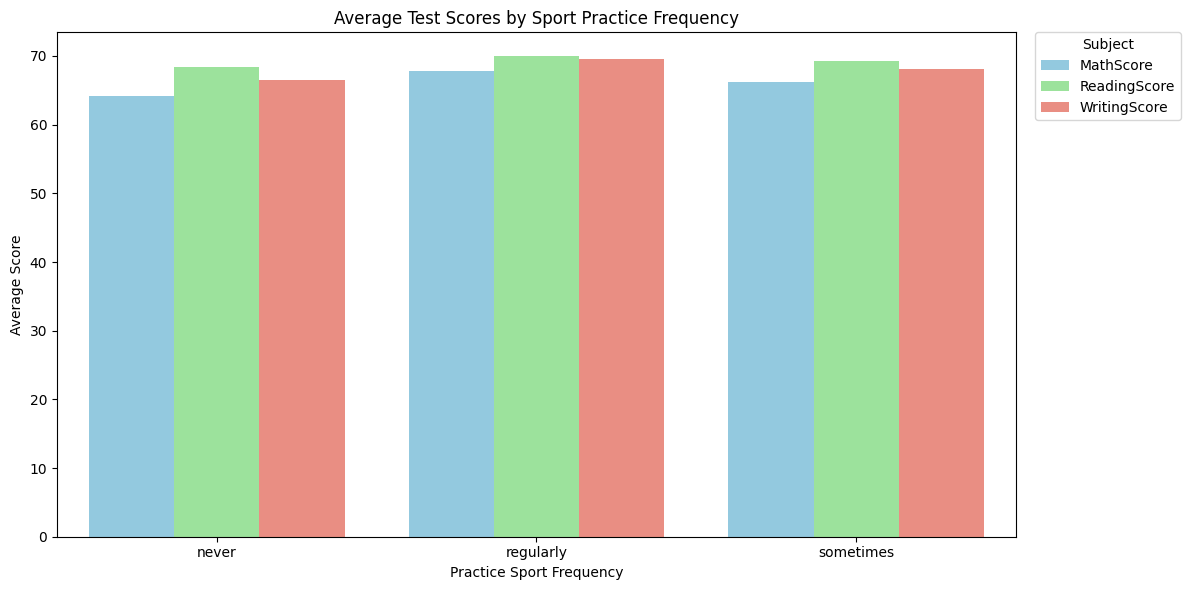

In [68]:
sport_melted = sport_performance.melt(id_vars='PracticeSport', 
                                      value_vars=['MathScore', 'ReadingScore', 'WritingScore'], 
                                      var_name='Subject', 
                                      value_name='AverageScore')

# Plotting
plt.figure(figsize=(12, 6))

# Single barplot with hue
sns.barplot(x='PracticeSport', y='AverageScore', hue='Subject', data=sport_melted, palette=['skyblue', 'lightgreen', 'salmon'])

# Adding labels
plt.title('Average Test Scores by Sport Practice Frequency')
plt.xlabel('Practice Sport Frequency')
plt.ylabel('Average Score')

# Move legend outside the plot
plt.legend(title='Subject', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.tight_layout()
plt.show()


# how transport mode affects student performance.

In [70]:
transport_performance = df.groupby('TransportMeans').agg({'MathScore': 'mean',
    'ReadingScore': 'mean',
    'WritingScore': 'mean'
}).reset_index()

print("Average Scores by Transport Mode:")
print(transport_performance)


Average Scores by Transport Mode:
  TransportMeans  MathScore  ReadingScore  WritingScore
0        private  66.511354     69.472364     68.509593
1     school_bus  66.674636     69.446206     68.492351


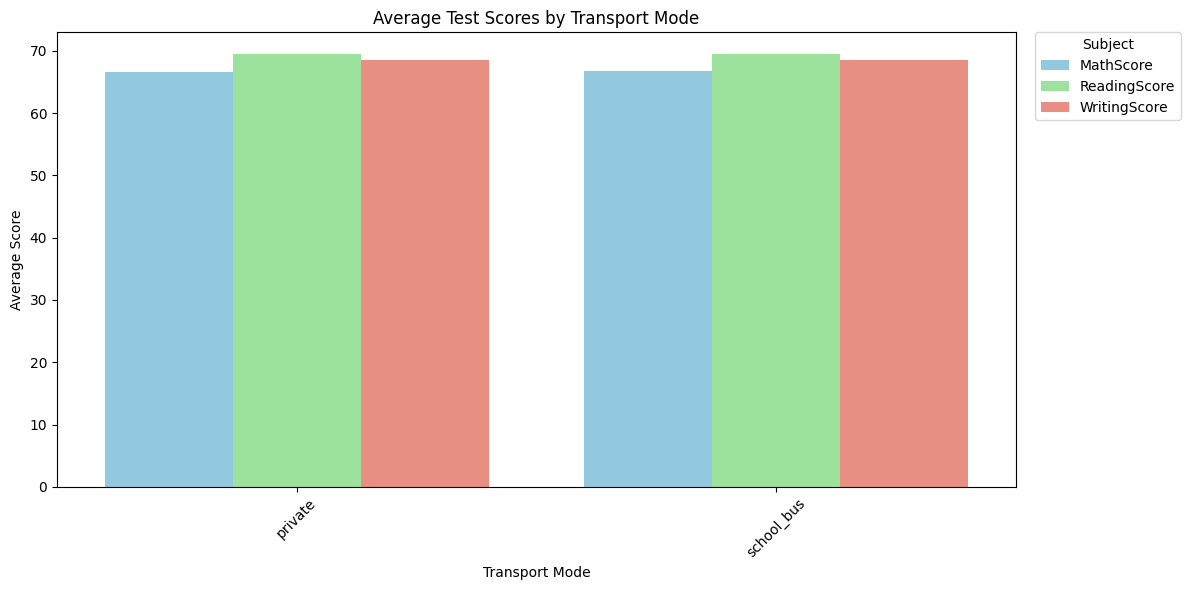

In [71]:
transport_melted = transport_performance.melt(id_vars='TransportMeans', 
                                              value_vars=['MathScore', 'ReadingScore', 'WritingScore'], 
                                              var_name='Subject', 
                                              value_name='AverageScore')

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot with hue
sns.barplot(x='TransportMeans', y='AverageScore', hue='Subject', data=transport_melted, palette=['skyblue', 'lightgreen', 'salmon'])

# Adding labels
plt.title('Average Test Scores by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Score')

# Move legend outside the plot
plt.legend(title='Subject', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.tight_layout()
plt.show()

# Score Distribution by Test Prep Status

C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_11396\2289196061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TestPrep', y='MathScore', data=df, palette='pastel')
C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_11396\2289196061.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TestPrep', y='ReadingScore', data=df, palette='muted')
C:\Users\Abhishek upadhyay\AppData\Local\Temp\ipykernel_11396\2289196061.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TestPrep', y='WritingScore', data=df, palette='bright

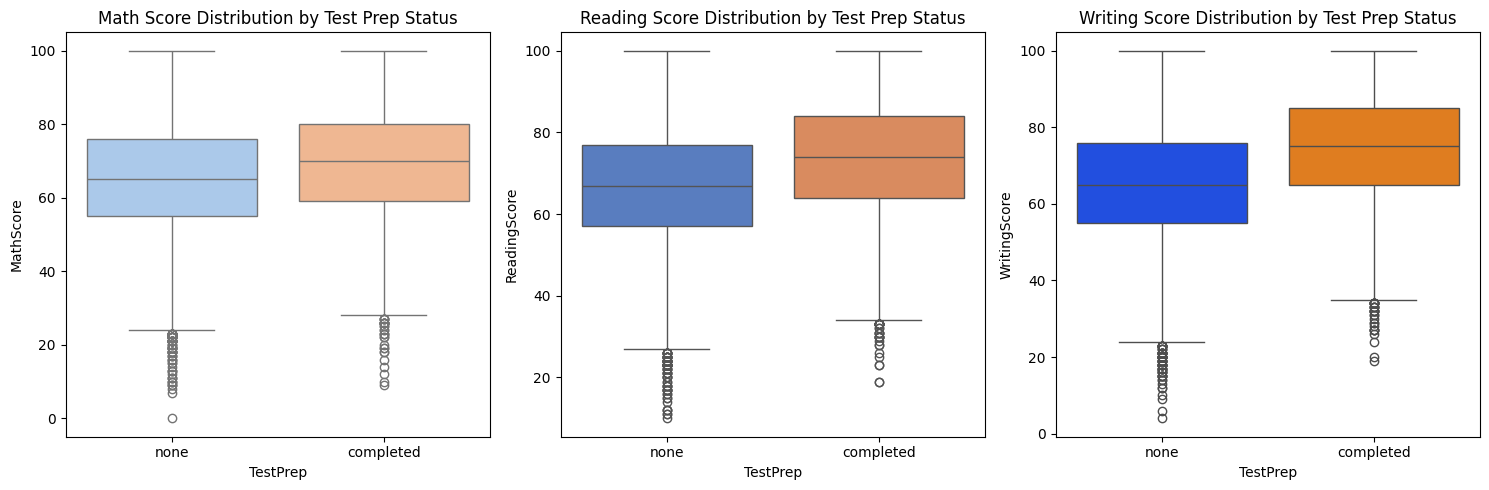

In [72]:
# Plotting
plt.figure(figsize=(15, 5))

# Math Score by Test Prep
plt.subplot(1, 3, 1)
sns.boxplot(x='TestPrep', y='MathScore', data=df, palette='pastel')
plt.title('Math Score Distribution by Test Prep Status')

# Reading Score by Test Prep
plt.subplot(1, 3, 2)
sns.boxplot(x='TestPrep', y='ReadingScore', data=df, palette='muted')
plt.title('Reading Score Distribution by Test Prep Status')

# Writing Score by Test Prep
plt.subplot(1, 3, 3)
sns.boxplot(x='TestPrep', y='WritingScore', data=df, palette='bright')
plt.title('Writing Score Distribution by Test Prep Status')

plt.tight_layout()
plt.show()


# Correlation Matrix for Scores

In [73]:

correlation_matrix = df[['MathScore', 'ReadingScore', 'WritingScore']].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              MathScore  ReadingScore  WritingScore
MathScore      1.000000      0.817825      0.807118
ReadingScore   0.817825      1.000000      0.952584
WritingScore   0.807118      0.952584      1.000000


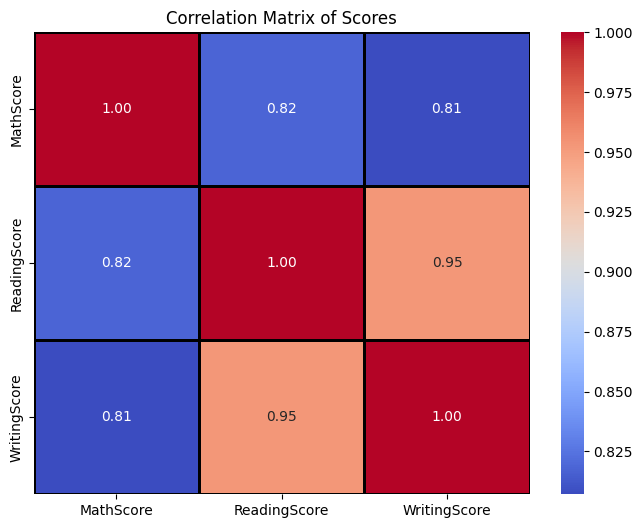

In [74]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1, linecolor='black')

plt.title('Correlation Matrix of Scores')
plt.show()

# Score by Parental Education Level

In [75]:
education_performance = df.groupby('ParentEduc').agg({
    'MathScore': 'mean',
    'ReadingScore': 'mean',
    'WritingScore': 'mean'
}).reset_index()

print("Average Scores by Parental Education Level:")
print(education_performance)


Average Scores by Parental Education Level:
           ParentEduc  MathScore  ReadingScore  WritingScore
0  associate's degree  68.365586     71.124324     70.299099
1   bachelor's degree  70.466627     73.062020     73.331069
2         high school  64.435731     67.213997     65.421136
3     master's degree  72.336134     75.832921     76.356896
4        some college  66.390472     69.179708     68.501432
5    some high school  62.584013     65.510785     63.632409


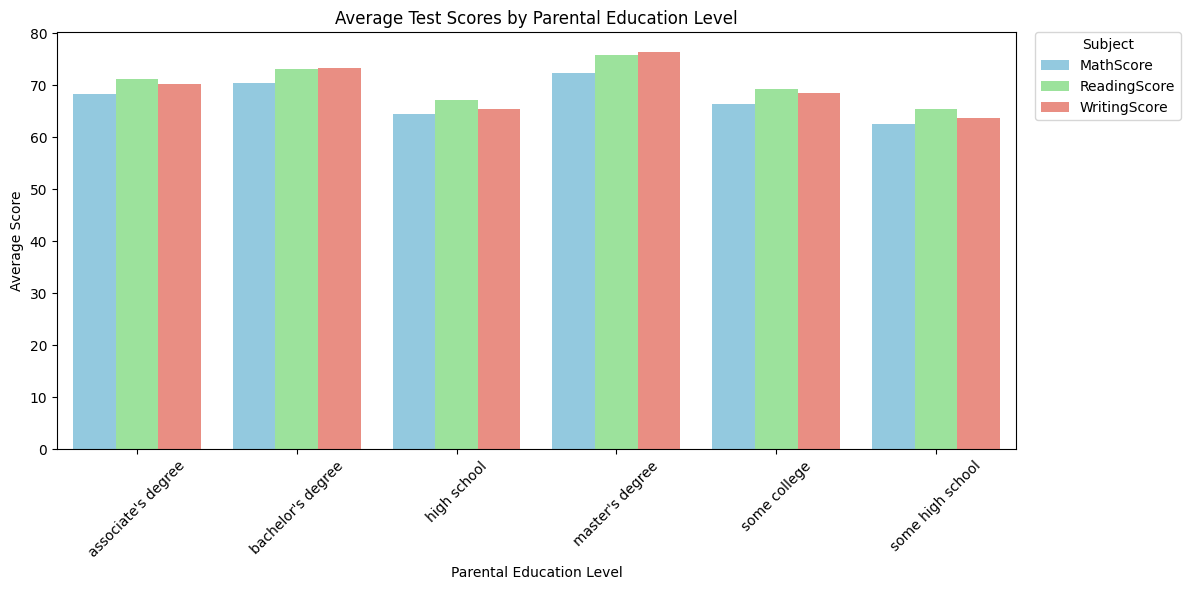

In [76]:
education_melted = education_performance.melt(id_vars='ParentEduc', 
                                              value_vars=['MathScore', 'ReadingScore', 'WritingScore'], 
                                              var_name='Subject', 
                                              value_name='AverageScore')

plt.figure(figsize=(12, 6))

sns.barplot(x='ParentEduc', y='AverageScore', hue='Subject', data=education_melted, palette=['skyblue', 'lightgreen', 'salmon'])

plt.title('Average Test Scores by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')

plt.legend(title='Subject', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Score Distributions by Gender and Ethnic Group

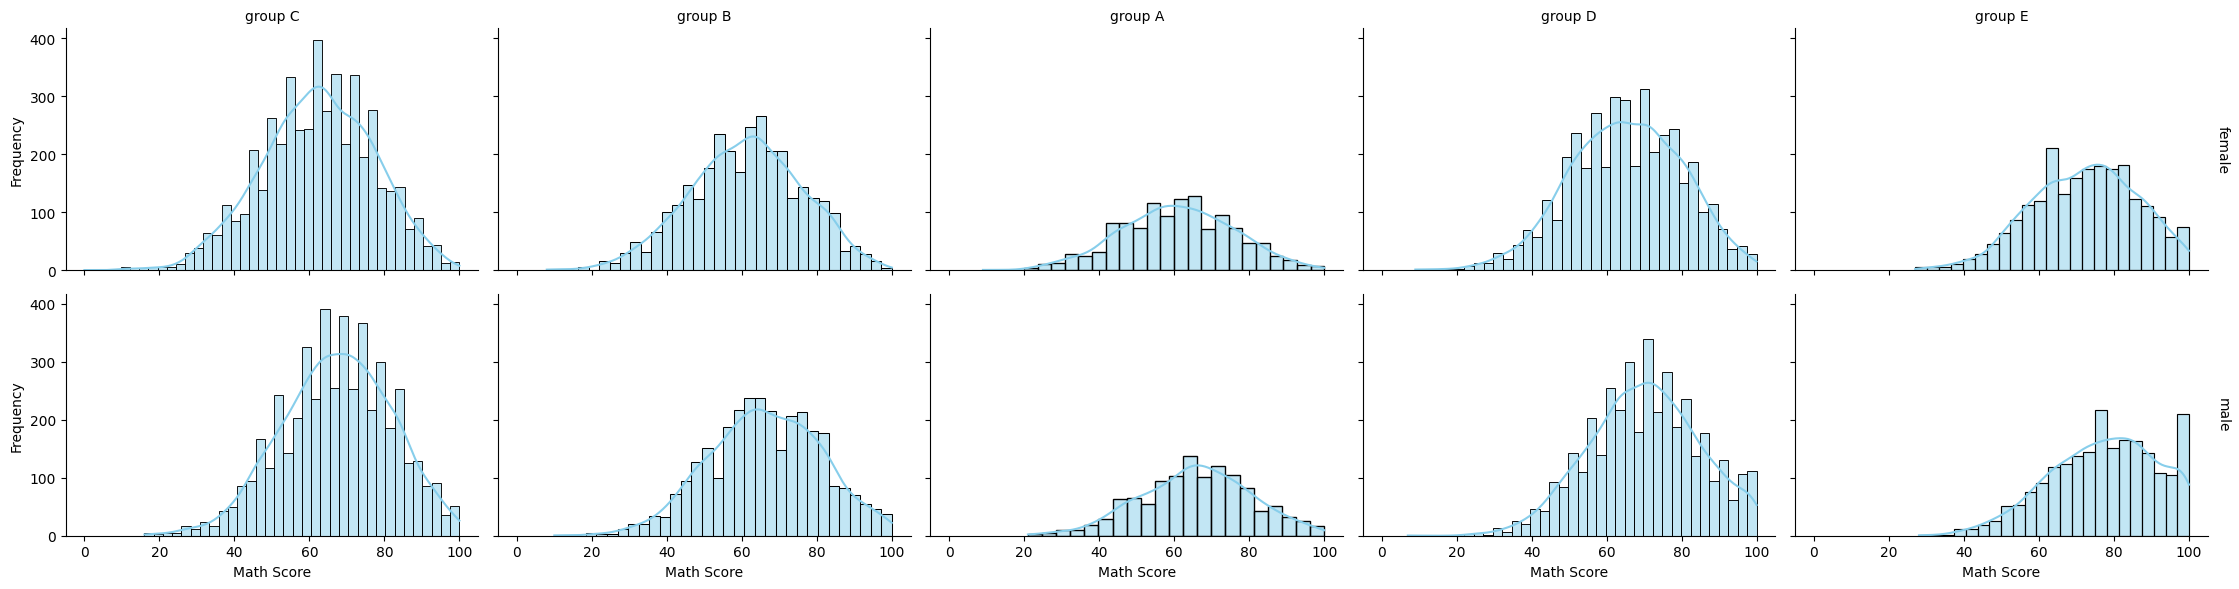

In [85]:
g = sns.FacetGrid(df, col="EthnicGroup", row="Gender", margin_titles=True, height=3, aspect=1.5)

g.map_dataframe(sns.histplot, x='MathScore', color='skyblue', kde=True)

g.set_axis_labels("Math Score", "Frequency")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()

plt.show()
